# Problem 4, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 4 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [4]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 4F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 4C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [5]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    total = 0.0
    for i in range(0, len(X)):
        total += (Y[i] - np.dot(w,X[i]))**2
    return total    

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    return -2 * (y - np.dot(w, x)) * x

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    losses = np.empty(N_epochs)
    new_w = w_start
    for q in range(N_epochs):
        for i in np.random.permutation(len(X)):
            new_w = new_w - eta * gradient(X[i], Y[i], new_w)
        losses[q] = loss(X, Y, new_w)
    
    return new_w, losses

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [6]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [20]:
dataset = load_data('data/sgd_data.csv')

X = dataset[:, [0, 1, 2, 3]]
Y = dataset[:, 4]
bias = 0.001
N_epochs = 1000

X = np.c_[np.transpose(bias * np.ones(len(dataset))) , X]

w_start = [1, 0.001, 0.001, 0.001, 0.001]
final_weight, dummy = SGD(X, Y, w_start, np.exp(-15), N_epochs)
print(final_weight)

[  0.99975883  -5.98980622   3.97771672 -11.86690775   8.90110846]


## Problem 4G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

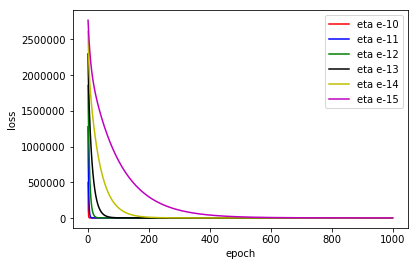

In [24]:
eta_vals = [np.exp(-10), np.exp(-11), np.exp(-12), np.exp(-13),
            np.exp(-14),np.exp(-15)]
w_start = [1, 0.001, 0.001, 0.001, 0.001]

dummy, losses1 = SGD(X, Y, w_start, eta_vals[0], N_epochs)
dummy, losses2 = SGD(X, Y, w_start, eta_vals[1], N_epochs)
dummy, losses3 = SGD(X, Y, w_start, eta_vals[2], N_epochs)
dummy, losses4 = SGD(X, Y, w_start, eta_vals[3], N_epochs)
dummy, losses5 = SGD(X, Y, w_start, eta_vals[4], N_epochs)
dummy, losses6 = SGD(X, Y, w_start, eta_vals[5], N_epochs)
xs = range(N_epochs)
plt.figure()
plt.plot(xs, losses1, 'r', label='eta e-10')
plt.plot(xs, losses2, 'b', label='eta e-11')
plt.plot(xs, losses3, 'g', label='eta e-12')
plt.plot(xs, losses4, 'k', label='eta e-13')
plt.plot(xs, losses5, 'y', label='eta e-14')
plt.plot(xs, losses6, 'm', label='eta e-15')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
    

## Problem 4H

Provide your code for computing the least-squares analytical solution below.

In [28]:
X = dataset[:, [0, 1, 2, 3]]
Y = dataset[:, 4]
X = np.c_[np.transpose(bias * np.ones(len(dataset))) , X]

total1 = 0.0
X_copy = X
for i in range(len(X)):
    total1 += np.dot(X[i], np.transpose(X[i]))
    X_copy[i] *= Y[i]

w = (1.0 / total1) * (np.sum(X_copy, axis=0))
print(w)

[ -1.82932333e-04  -1.27968069e+00  -6.69434828e-01  -1.64986102e+00
  -3.91105788e-01]
